# Ensemble Methods

Ensemble methods in machine learning and artificial intelligence refer to techniques that combine multiple models to improve performance. The basic idea is that by combining several models, the ensemble can often outperform individual models by reducing overfitting, increasing robustness, and capturing different patterns in the data.

There are several types of ensemble methods, but the most common ones are:
1. Bagging (Bootstrap Aggregating):

    Goal: Reduce variance by combining multiple models trained on different subsets of the training data.
    How it works:
        Multiple models are trained independently on different random subsets of the dataset (with replacement).
        Predictions are made by averaging (for regression) or majority voting (for classification) the predictions of all models.
    Example: Random Forest, which is an ensemble of decision trees.

2. Boosting:

    Goal: Reduce bias by focusing on hard-to-predict instances through a sequence of models.
    How it works:
        Models are trained sequentially, where each new model tries to correct the errors made by previous models.
        The models are weighted according to their performance, with more emphasis placed on harder-to-classify examples.
    Example: AdaBoost, Gradient Boosting, XGBoost, and LightGBM.

3. Stacking (Stacked Generalization):

    Goal: Combine predictions from multiple models to improve the overall prediction performance.
    How it works:
        Multiple base models (can be of different types) are trained on the dataset.
        A meta-model (usually a simpler model) is then trained to combine the outputs of the base models.
        The meta-model is typically trained on the predictions of the base models rather than on the original features.
    Example: Stacked generalization using models like logistic regression, decision trees, etc., as base learners.

4. Voting:

    Goal: Combine multiple models by voting on their predictions.
    How it works:
        In classification tasks, each model gives its predicted class, and the class with the most votes becomes the final prediction.
        For regression, the final prediction is typically the average of all models’ predictions.
    Example: Hard Voting (majority voting) and Soft Voting (weighted average of probabilities).

Benefits of Ensemble Methods:

    Improved accuracy: By combining multiple models, the ensemble often performs better than any individual model.
    Robustness: It can reduce the impact of overfitting and variance, especially if the base models have high variance.
    Handling different kinds of errors: Some models might make different kinds of errors, and by combining them, the ensemble can help in minimizing such mistakes.

# Random Forest 

Put simply, the random forest algorithm is an ensemble of decision trees. However, you may recall that decision trees use a greedy algorithm, meaning that given the same data, the algorithm will make a choice that maximizes information gain at every step. By itself, this presents a problem -- it doesn't matter how many trees we add to our forest if they're all the same tree! Trees trained on the same dataset will come out the exact same way every time -- there is no randomness to this algorithm. It doesn't matter if our forest has a million decision trees; if they are all exactly the same, then our performance will be no better than if we just had a single tree.

### Bagging

The first way to encourage differences among the trees in our forest is to train them on different samples of data. Although more data is generally better, if we gave every tree the entire dataset, we would end up with each tree being exactly the same. Because of this, we instead use Bootstrap Aggregation (AKA Bagging) to obtain a portion of our data by sampling with replacement. For each tree, we sample two-thirds of our training data with replacement -- this is the data that will be used to build our tree. The remaining data is used as an internal test set to test each tree -- this remaining one-third is referred to as Out-Of-Bag Data, or OOB. For each new tree created, the algorithm then uses the remaining one-third of data that wasn't sampled to calculate the Out-Of-Bag Error, in order to get a running, unbiased estimate of overall tree performance for each tree in the forest

### Subspace sampling method

After bagging the data, the random forest uses the Subspace sampling method to further increase variability between the trees. Although it has a fancy mathematical-sounding name, all this method does is randomly select a subset of features to use as predictors for each node when training a decision tree, instead of using all predictors available at each node. 

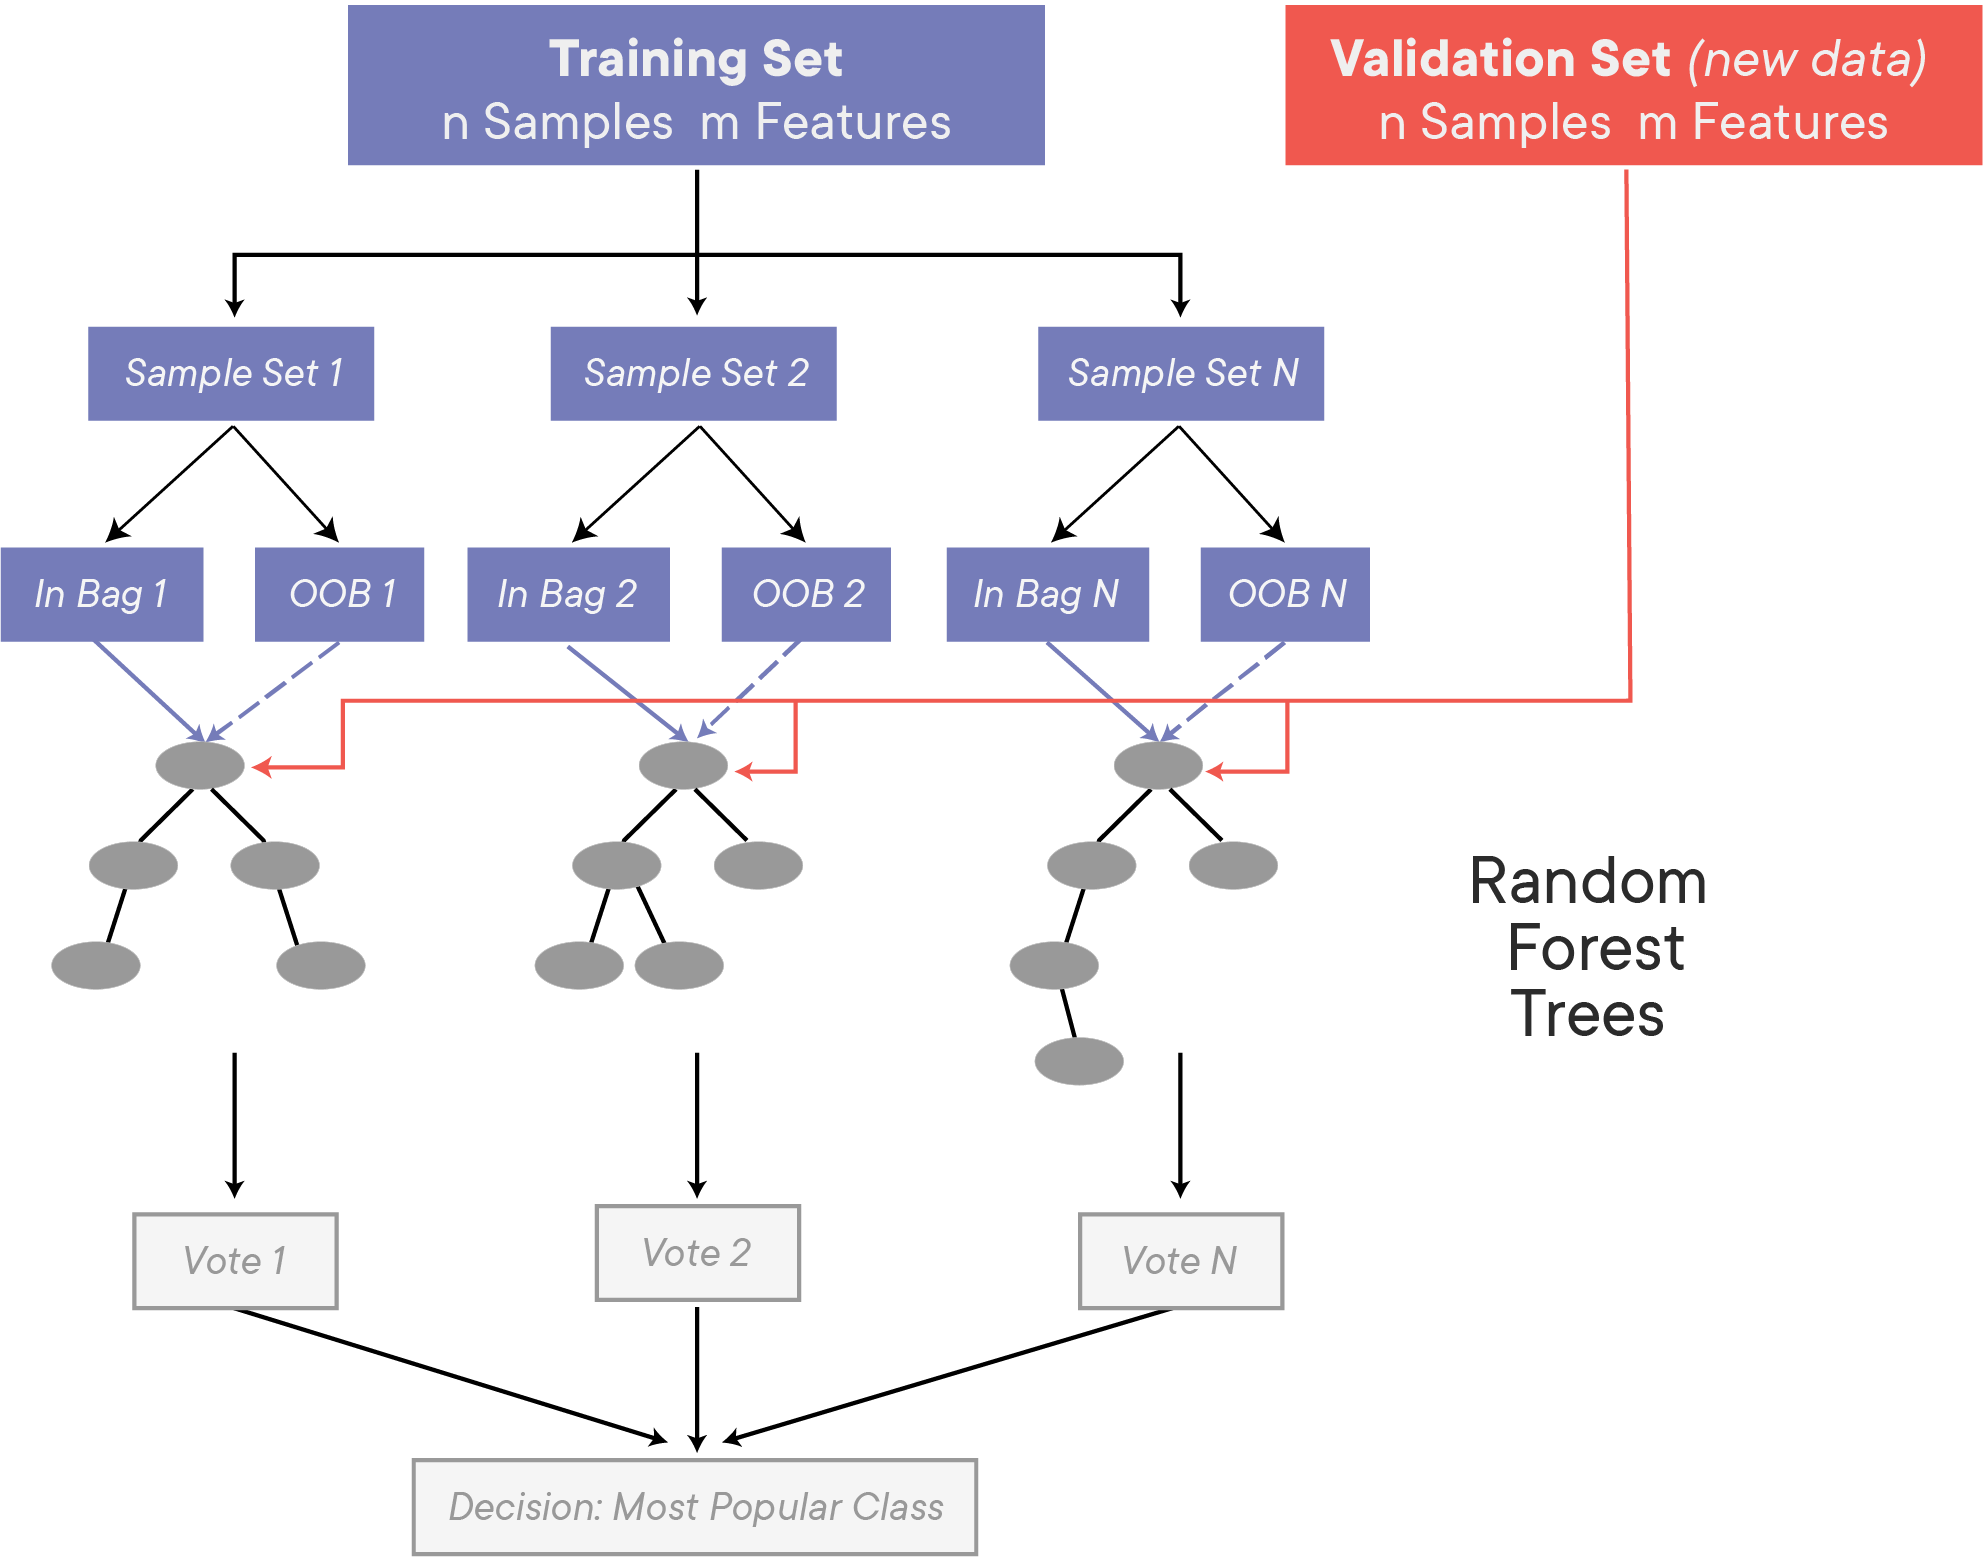

### Random Forest Example


In [1]:
# Random Forest 

import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
df = pd.read_csv("./data/salaries_final.csv",index_col=0)
df.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32561 non-null  int64 
 1   Education     32561 non-null  object
 2   Occupation    32561 non-null  object
 3   Relationship  32561 non-null  object
 4   Race          32561 non-null  object
 5   Sex           32561 non-null  object
 6   Target        32561 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
df.isna().sum()

Age             0
Education       0
Occupation      0
Relationship    0
Race            0
Sex             0
Target          0
dtype: int64

In [5]:
df["Target"].value_counts()

Target
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [7]:
y = pd.get_dummies(y,drop_first=True,dtype=int)
y.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [9]:
cat_cols = ["Education","Occupation","Relationship","Race","Sex"]
num_cols = ["Age"]

In [12]:
#create a tranformer
transformer = ColumnTransformer([
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder()),
        ]), cat_cols),
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler()),
        ]), num_cols)
])

In [14]:
# base estimator for ensemble methods 
from sklearn.ensemble import RandomForestClassifier
base_estimator = RandomForestClassifier(random_state=42)
base_estimator

RandomForestClassifier(random_state=42)

In [19]:
# create a pipeline
pipe = Pipeline([
    ("pre_pro", transformer),
    ("model", DecisionTreeClassifier)
])


In [21]:
# fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


AttributeError: 'csr_matrix' object has no attribute '_validate_params'

In [22]:
# print report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     19776
           1       0.58      0.53      0.55      6273

    accuracy                           0.79     26049
   macro avg       0.72      0.70      0.71     26049
weighted avg       0.79      0.79      0.79     26049



### Bagging Model

In [23]:
# set up a BaggingClassifier
pipe.set_params(model)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# fit and predict


In [ ]:
# print report

print(classification_report(y_test,y_pred))

### Random Forest Model

In [ ]:
# set up Random Forest Classifier


In [ ]:
# fit and predict


In [ ]:
print(classification_report(y_test,y_pred))

## Gradient Boosting and Weak Learners

### Strong Learners 

All the models we've learned so far are Strong Learners -- models with the goal of doing as well as possible on the classification or regression task they are given.

### Weak learners

The term Weak Learner refers to simple models that do only slightly better than random chance. Boosting algorithms start with a single weak learner (tree methods are overwhelmingly used here), but technically, any model will do

## How Gradient Boosting Works 

- Train a single weak learner
- Figure out which examples the weak learner got wrong
- Build another weak learner that focuses on the areas the first weak learner got wrong
- Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the - - model's performance has plateaued

## ADA Boost

**AdaBoost** (Adaptive Boosting) is an ensemble method that combines multiple weak learners (usually decision stumps) to create a strong model. It works by training each weak learner sequentially, where each new learner focuses more on the mistakes made by previous ones. Misclassified instances are given higher weights so the next model pays more attention to them.

### Key Steps:
1. **Initialize weights**: Assign equal weights to all training samples.
2. **Train weak learners**: Train a weak model (e.g., decision stump) on weighted data.
3. **Update weights**: Increase the weights of misclassified samples for the next learner.
4. **Final prediction**: Combine the weak models' predictions using weighted voting (for classification) or averaging (for regression).

### Benefits:
- **Improves accuracy** by focusing on difficult-to-classify instances.
- **Simple** but effective for boosting weak models.

### Drawbacks:
- **Sensitive to noisy data** and outliers due to its focus on misclassified instances.

In [ ]:
# set up adaboost classifier


In [ ]:
# fit and predict


In [ ]:
print(classification_report(y_test,y_pred))

## Gradient Boosting

The **Gradient Boosting Classifier** is an ensemble machine learning method that builds a strong predictive model by combining multiple weak learners, usually shallow decision trees. The key steps are:

1. **Sequential Model Building**: It starts with a simple model and iteratively adds trees, each correcting errors from the previous model.
2. **Gradient Descent**: It minimizes a loss function (like log-loss for classification) using gradient descent, adjusting the model in each iteration.
3. **Final Prediction**: The final prediction is a weighted sum of the predictions from all trees.

**Key Parameters**:
- **Learning rate**: Controls how much each tree contributes to the final model.
- **n_estimators**: The number of trees to build.
- **max_depth**: Depth of each tree.

**Advantages**:
- High accuracy and robustness to outliers.
- Handles complex relationships in data.

**Disadvantages**:
- Computationally expensive and prone to overfitting with too many trees.

In [ ]:
# Gradient Bossting model


In [ ]:
# fir and predict


In [ ]:
print(classification_report(y_test,y_pred))

## Extreem Gradient Boosting

XGBoost (Extreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm designed for speed and performance. It improves on standard Gradient Boosting by adding several techniques to reduce overfitting, speed up computation, and handle large datasets efficiently.
Key Features of XGBoost:

**Gradient Boosting Framework:**
    Like Gradient Boosting, XGBoost builds models sequentially where each model corrects the errors of the previous one by fitting to the residuals.

**Regularization:**

        XGBoost includes L1 (Lasso) and L2 (Ridge) regularization to control overfitting by penalizing overly complex models. This helps improve generalization.

**Tree Pruning:**

        Instead of stopping tree growth at a fixed depth, XGBoost uses max depth and minimum child weight to optimize tree size and prevent overfitting.
        It also uses post-pruning with depth-first or level-wise tree growth strategies.

**Handling Missing Data**:

        XGBoost automatically handles missing values, assigning them to the optimal split during training.

**Parallelization:**

        Unlike standard Gradient Boosting, XGBoost supports parallel processing to speed up training by training individual trees in parallel.

**Boosting with a Learning Rate:**
        As with standard Gradient Boosting, XGBoost uses a learning rate (also called shrinkage) to control how much each new tree contributes to the final model.

Key Steps in XGBoost:

**Initialize the Model:** 

Start with a basic model, such as predicting the mean value for regression or the most frequent class for classification.

**Calculate Residuals:**

 Compute the residuals (errors) between the predicted values and the true values.

**Fit Trees to Residuals:**

 Fit a decision tree to predict the residuals (error corrections).

**Update the Model:**

 Add the predictions from the new tree to the overall model, scaled by a learning rate.

**Repeat:**

Repeat the process for a predefined number of iterations or until the error stops improving.

## Final Prediction:

The final output is the sum of the predictions from all trees, weighted by their contribution, often adjusted by the learning rate.

## Benefits of XGBoost:

**High Performance:**

XGBoost is known for its speed and efficiency, making it suitable for large datasets.

**Regularization:**

Built-in regularization helps prevent overfitting and improves model generalization.

**Handles Missing Data:**

It can handle missing values in the dataset without needing imputation.

**Scalability:**

Can scale efficiently to large datasets with distributed computing and parallelization.

Drawbacks of XGBoost:

**Complexity:** 

XGBoost has more hyperparameters to tune compared to simpler models, which can make it harder to use effectively without experience.

**Computational Resources:**

While faster than traditional Gradient Boosting, XGBoost can still be computationally expensive for very large datasets or when hyperparameters are not well-tuned.

In [637]:
# xg boost




In [ ]:
# set up model


In [ ]:
# fit and predict 



In [ ]:
print(classification_report(y_test,y_pred))

## Extra work  

In [642]:
param_grid = {
    'model__booster': ['gbtree', 'dart'],  # Type of boosting model ('gbtree' or 'dart')
    'model__learning_rate': [0.01, 0.1, 0.2],  # Step size in each boosting round
    'model__n_estimators': [50, 100, 200],  # Number of trees (boosting rounds)
    'model__max_depth': [3, 6, 10],  # Maximum depth of each tree
    'model__min_child_weight': [1, 3, 5],  # Minimum sum of instance weight in a child node
    'model__subsample': [0.7, 0.8, 1.0],  # Fraction of data to sample for each tree
    'model__colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features to sample for each tree
    'model__gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a split
}

In [ ]:
pipe.set_params(model = XGBClassifier() )

In [644]:
# perform grid search for the above model

In [645]:
# grid.fit(X_train,y_train)
# y_pred = pipe.predict(X_test)

In [646]:
# grid.best_estimator_

In [647]:
# print(classification_report(y_test,y_pred))